In [1]:
import pandas as pd
bank_df = pd.read_csv("C:/Term 3/Supervised learning with python/Codes-Data-Files/Machine Learning (Codes and Data Files)/Data/Bank.csv")
bank_df

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no


In [2]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [3]:
X_features = list(bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [4]:
encoded_bank_df = pd.get_dummies(bank_df[X_features], drop_first = True)

In [5]:
encoded_bank_df = encoded_bank_df.astype(int)


In [6]:
encoded_bank_df


,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4517,57,-3313,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,1
4518,57,295,11,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4519,28,1137,4,3,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [7]:
Y =  bank_df.subscribed.map(lambda x: int(x == 'yes'))
X = encoded_bank_df

In [8]:
import statsmodels.api as sm
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   subscribed       Pseudo R-squared: 0.061     
Date:                 2024-03-02 21:04 AIC:              3082.2384 
No. Observations:     4521             BIC:              3236.2341 
Df Model:             23               Log-Likelihood:   -1517.1   
Df Residuals:         4497             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      1.4866e-29
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [9]:
def get_significant_vars(logit_model):
    var_p_values = pd.DataFrame(logit_model.pvalues)
    var_p_values["vars"] = var_p_values.index
    var_p_values.columns = ["pvals","vars"]
    return list(var_p_values[var_p_values["pvals"]<0.05]["vars"])

In [10]:
sig_vars = get_significant_vars(logit_model)
sig_vars.remove('const')

In [11]:
logit_model2 = sm.Logit(Y,sm.add_constant(X[sig_vars])).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             subscribed   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4513
Method:                           MLE   Df Model:                            7
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                 0.05626
Time:                        21:04:56   Log-Likelihood:                -1524.6
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                 8.189e-36
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4754      0.113    -13.026      0.000      -1.697      -1.253
current-campaign      -0.0893      0.024     -3.793      0.000      -0.135      -0.043
previous-campaign      0.1419      0.021      6.710      0.000       0.100       0.183
job_retired            0.8246      0.173      4.763      0.000       0.485       1.164
marital_married       -0.3767      0.097     -3.888      0.000      -0.567      -0.187
education_tertiary     0.2991      0.101      2.950      0.003       0.100       0.498
housing-loan_yes      -0.5834      0.099     -5.918      0.000      -0.777      -0.390
personal-loan_yes     -0.7025      0.167     -4.201      0.000      -1.030      -0.375
======================================================================================
"""

In [12]:
y_pred_df = pd.DataFrame({'actual': Y, 'predicted_prob':logit_model2.predict(sm.add_constant(X[sig_vars]))})
y_pred_df

,actual,predicted_prob
0,0,0.125484
1,0,0.065379
2,0,0.153527
3,0,0.039308
4,0,0.074130
...,...,...
4516,0,0.053042
4517,0,0.050772
4518,0,0.055482
4519,0,0.143832


In [13]:
sorted_predicted_df = y_pred_df.sort_values('predicted_prob',ascending = False)

In [14]:
sorted_predicted_df

,actual,predicted_prob
3682,0,0.864769
97,0,0.828031
3426,0,0.706809
1312,1,0.642337
3930,1,0.631032
...,...,...
298,1,0.005058
3125,0,0.004998
1363,0,0.003996
4301,0,0.001717


In [15]:
def get_decile(df):
    num_per_decile = int(len(df)/10)
    print("number of observation per decile ",num_per_decile)
    idx = 0
    df["decile"] = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')] = each_d
        idx = idx+num_per_decile
    df['decile'] = df['decile']+1
    return df

In [16]:
decile_predict_df = get_decile(sorted_predicted_df)

number of observation per decile  452


In [17]:
decile_predict_df[0:10]

,actual,predicted_prob,decile
3682,0,0.864769,1
97,0,0.828031,1
3426,0,0.706809,1
1312,1,0.642337,1
3930,1,0.631032,1
4397,0,0.619146,1
2070,0,0.609129,1
3023,0,0.573199,1
4080,0,0.572364,1
804,0,0.559350,1


In [18]:
gain_lift_df = pd.DataFrame(decile_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']
gain_lift_df

,decile,gain
0,1,125
1,2,83
2,3,73
3,4,53
4,5,31
5,6,46
6,7,37
7,8,28
8,9,25
9,10,20


In [19]:
gain_lift_df['gain_percentage'] = 100*gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum()
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


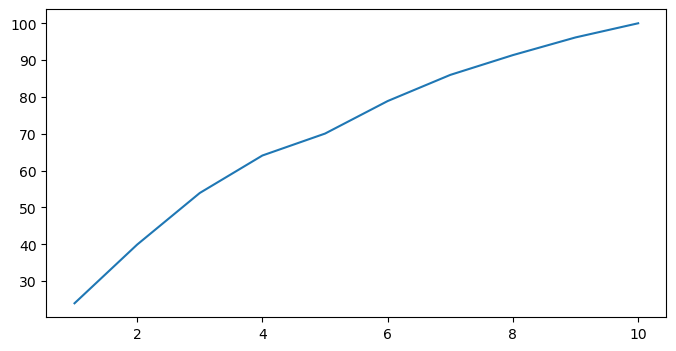

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')
plt.show()

In [21]:
gain_lift_df['lift'] = gain_lift_df['gain_percentage']/(gain_lift_df.decile*10)
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


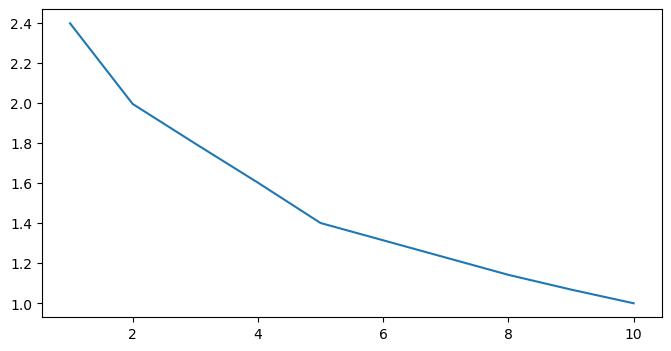

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.show()